Instrucciones
Ítem 1

Investiguen las siguientes preguntas

1.- Estudien la correlación entre el valor de la matrícula y el valor del arancel para toda la base de datos y luego separen por tipo de institución. ¿Los grupos se comportan parecido? ¿Vale la pena estudiar todos los grupos? Visualicen apropiadamente.




In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('15_MATRICULAS_ED_SUPERIOR_AYSEN_2021.xlsx')
df


,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,1102,Femenino,31,30 a 34,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Tecnicas,Administracion y Comercio,5,0,5,140000,1736000,Aysen,Coyhaique,Coyhaique
1,1701,Masculino,54,40 y mas,2020,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Tecnologia,4,0,4,240000,2240000,Aysen,Coyhaique,Coyhaique
2,2582,Femenino,48,40 y mas,2020,Primer semestre,Institutos Profesionales,IP LIBERTADOR DE LOS ANDES,NO ACREDITADA,NaN,...,Carreras Tecnicas,Ciencias Sociales,5,1,5,60000,1080000,Aysen,Coyhaique,Coyhaique
3,4367,Masculino,20,20 a 24,2020,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Administracion y Comercio,4,0,4,240000,2284000,Aysen,Coyhaique,Coyhaique
4,4384,Femenino,43,40 y mas,2019,Primer semestre,Institutos Profesionales,IP LIBERTADOR DE LOS ANDES,NO ACREDITADA,NaN,...,Carreras Tecnicas,Ciencias Sociales,5,1,5,60000,1080000,Aysen,Coyhaique,Coyhaique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,1046361,Masculino,19,15 a 19,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Profesionales,Tecnologia,4,0,4,175000,3869000,Aysen,Coyhaique,Coyhaique
2345,1046510,Femenino,23,20 a 24,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Profesionales,Educacion,10,0,10,175000,2781000,Aysen,Coyhaique,Coyhaique
2346,1046738,Femenino,30,30 a 34,2020,Primer semestre,Centros de Formacion Tecnica,CFT LOS LAGOS,NO ACREDITADA,NaN,...,Carreras Tecnicas,Administracion y Comercio,5,1,5,115000,1150000,Aysen,Coyhaique,Coyhaique
2347,1047571,Femenino,21,20 a 24,2018,Primer semestre,Universidades Privadas,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP,ACREDITADA,27/11/2018 AL 27/11/2021,...,Carreras Profesionales,Educacion,8,0,8,240000,1994000,Aysen,Coyhaique,Coyhaique


In [64]:
#Calculo de covarianza y correlacion de toda la base de datos

covar = df['VALOR MATRICULA (PESOS)'].cov(df['VALOR ARANCEL (PESOS)'])
correlacion =df['VALOR MATRICULA (PESOS)'].corr(df['VALOR ARANCEL (PESOS)'])

print(f'Covarianza: {covar:.1f}\nCorrelación lineal de Pearson: {correlacion:.1f}')

Covarianza: 7318868651.2
Correlación lineal de Pearson: 0.2


Pendiente: 0.02
Intercepto: 123042.08
Modelo de regresión lineal: y = 0.02x + 123042.08


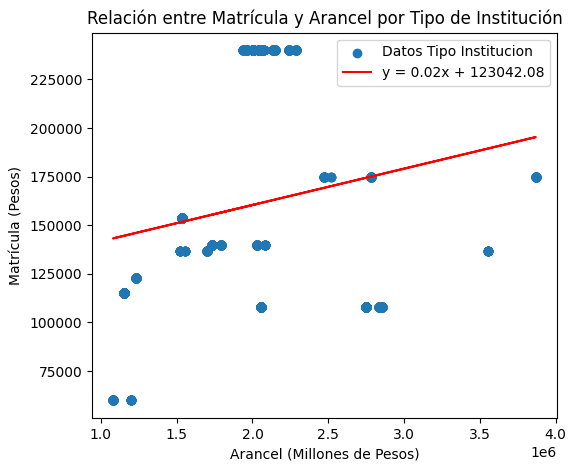

In [75]:
import numpy as np
import matplotlib.pyplot as plt

v_indep = df['VALOR ARANCEL (PESOS)']       
v_depen = df['VALOR MATRICULA (PESOS)']     

modelo = np.polyfit(v_indep, v_depen, 1)
pendiente, intercepto = modelo

print(f'Pendiente: {pendiente:.2f}')
print(f'Intercepto: {intercepto:.2f}')
print(f'Modelo de regresión lineal: y = {pendiente:.2f}x + {intercepto:.2f}')

# Gráfico de dispersion
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(v_indep, v_depen, label='Datos Tipo Institucion')
ax.plot(v_indep, pendiente * v_indep + intercepto, color='red',
        label=f'y = {pendiente:.2f}x + {intercepto:.2f}')
ax.set_title('Relación entre Matrícula y Arancel por Tipo de Institución')
ax.set_xlabel('Arancel (Millones de Pesos)')
ax.set_ylabel('Matrícula (Pesos)')
ax.legend()
plt.show()

In [73]:
# Filtro las filas que correspondan a Centros de Formación Técnica
Tipoinstitucion_CFT = df[df['TIPO DE INSTITUCION'] == 'Centros de Formacion Tecnica']

covar_CFT = Tipoinstitucion_CFT['VALOR MATRICULA (PESOS)'].cov(Tipoinstitucion_CFT['VALOR ARANCEL (PESOS)'])

corr_CFT = Tipoinstitucion_CFT['VALOR MATRICULA (PESOS)'].corr(Tipoinstitucion_CFT['VALOR ARANCEL (PESOS)'])

print(f'Covarianza CFT: {covar_CFT:.1f}')
print(f'Correlación Pearson CFT: {corr_CFT:.1f}')



Covarianza CFT: 28705688165.8
Correlación Pearson CFT: 1.0


Pendiente: 0.13
Intercepto: -31739.29
El modelo de regresión lineal es f(x)=0.13x + -31739.29


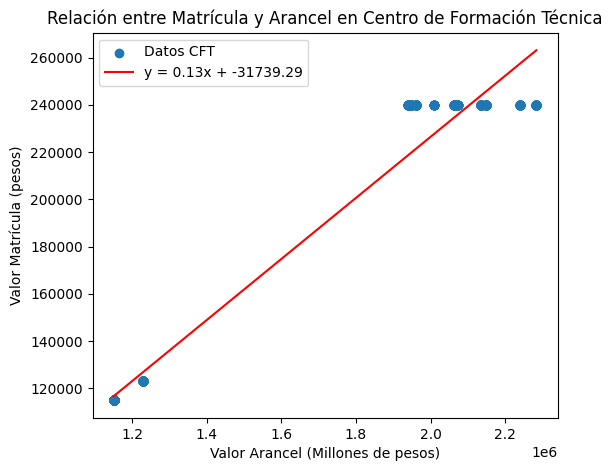

In [80]:

Tipoinstitucion_IP = df[df['TIPO DE INSTITUCION'] == 'Centros de Formacion Tecnica']

v_indep = Tipoinstitucion_CFT['VALOR ARANCEL (PESOS)']
v_depen = Tipoinstitucion_CFT['VALOR MATRICULA (PESOS)']

modelo = np.polyfit(v_indep, v_depen, 1)
pendiente, intercepto = modelo

print(f'Pendiente: {pendiente:.2f}\nIntercepto: {intercepto:.2f}')
print(f'El modelo de regresión lineal es f(x)={pendiente:.2f}x + {intercepto:.2f}')

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(v_indep, v_depen, label='Datos CFT')
x_seq = np.linspace(min(v_indep), max(v_indep), 100)
ax.plot(x_seq, pendiente * x_seq + intercepto, color='red', label=f'y = {pendiente:.2f}x + {intercepto:.2f}')
ax.set_title('Relación entre Matrícula y Arancel en Centro de Formación Técnica')
ax.set_xlabel('Valor Arancel (Millones de pesos)')
ax.set_ylabel('Valor Matrícula (pesos)')
ax.legend()

plt.show()

In [49]:
# Filtro las filas que correspondan a Institutos Profesionales
Tipoinstitucion_IP = df[df['TIPO DE INSTITUCION'] == 'Institutos Profesionales']

covar_IP = Tipoinstitucion_IP['VALOR MATRICULA (PESOS)'].cov(Tipoinstitucion_IP['VALOR ARANCEL (PESOS)'])

corr_IP = Tipoinstitucion_IP['VALOR MATRICULA (PESOS)'].corr(Tipoinstitucion_IP['VALOR ARANCEL (PESOS)'])

print(f'Covarianza IP: {covar_IP:.1f}')
print(f'Correlación Pearson IP: {corr_IP:.1f}')

Covarianza IP: 26959567678.9
Correlación Pearson IP: 1.0


Pendiente: 0.17
Intercepto: -120830.39
El modelo de regresión lineal es f(x)=0.17x + -120830.39


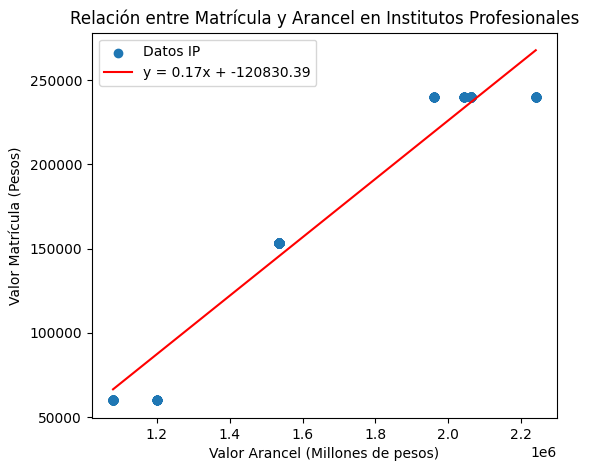

In [81]:

Tipoinstitucion_IP = df[df['TIPO DE INSTITUCION'] == 'Institutos Profesionales']

v_indep = Tipoinstitucion_IP['VALOR ARANCEL (PESOS)']
v_depen = Tipoinstitucion_IP['VALOR MATRICULA (PESOS)']

modelo = np.polyfit(v_indep, v_depen, 1)
pendiente, intercepto = modelo

print(f'Pendiente: {pendiente:.2f}\nIntercepto: {intercepto:.2f}')
print(f'El modelo de regresión lineal es f(x)={pendiente:.2f}x + {intercepto:.2f}')

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(v_indep, v_depen, label='Datos IP')
x_seq = np.linspace(min(v_indep), max(v_indep), 100)
ax.plot(x_seq, pendiente * x_seq + intercepto, color='red', label=f'y = {pendiente:.2f}x + {intercepto:.2f}')
ax.set_title('Relación entre Matrícula y Arancel en Institutos Profesionales')
ax.set_xlabel('Valor Arancel (Millones de pesos)')
ax.set_ylabel('Valor Matrícula (Pesos)')
ax.legend()

plt.show()

In [90]:
# Filtro las filas que correspondan a Universidades Privadas
Tipoinstitucion_UP = df[df['TIPO DE INSTITUCION'] == 'Universidades Privadas']

covar_UP = Tipoinstitucion_UP['VALOR MATRICULA (PESOS)'].cov(Tipoinstitucion_UP['VALOR ARANCEL (PESOS)'])

corr_UP = Tipoinstitucion_UP['VALOR MATRICULA (PESOS)'].corr(Tipoinstitucion_UP['VALOR ARANCEL (PESOS)'])

print(f'Covarianza UP: {covar_UP:.1f}')
print(f'Correlación Pearson UP: {corr_UP:.1f}')

Covarianza UP: 0.0
Correlación Pearson UP: nan


Pendiente: -0.00
Intercepto: 240000.00
El modelo de regresión lineal es f(x)=-0.00x + 240000.00


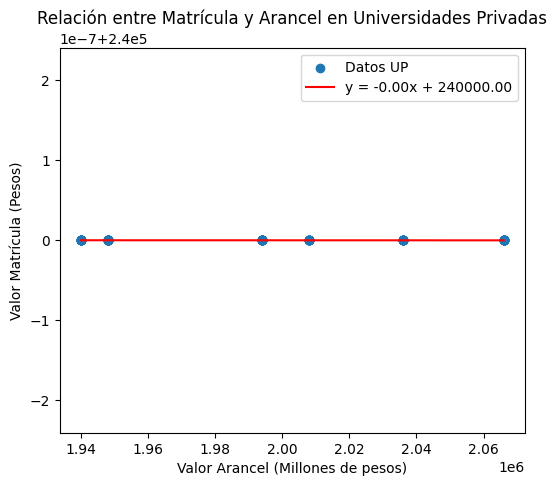

In [92]:
Tipoinstitucion_UP = df[df['TIPO DE INSTITUCION'] == 'Universidades Privadas']

v_indep = Tipoinstitucion_UP['VALOR ARANCEL (PESOS)']
v_depen = Tipoinstitucion_UP['VALOR MATRICULA (PESOS)']

modelo = np.polyfit(v_indep, v_depen, 1)
pendiente, intercepto = modelo

print(f'Pendiente: {pendiente:.2f}\nIntercepto: {intercepto:.2f}')
print(f'El modelo de regresión lineal es f(x)={pendiente:.2f}x + {intercepto:.2f}')

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(v_indep, v_depen, label='Datos UP')
x_seq = np.linspace(min(v_indep), max(v_indep), 100)
ax.plot(x_seq, pendiente * x_seq + intercepto, color='red', label=f'y = {pendiente:.2f}x + {intercepto:.2f}')
ax.set_title('Relación entre Matrícula y Arancel en Universidades Privadas')
ax.set_xlabel('Valor Arancel (Millones de pesos)')
ax.set_ylabel('Valor Matrícula (Pesos)')
ax.legend()

plt.show()


In [54]:
# Filtro las filas que correspondan a Universidades CRUCH
Tipoinstitucion_CRUCH = df[df['TIPO DE INSTITUCION'] == 'Universidades CRUCH']

covar_CRUCH = Tipoinstitucion_CRUCH['VALOR MATRICULA (PESOS)'].cov(Tipoinstitucion_CRUCH['VALOR ARANCEL (PESOS)'])

corr_CRUCH = Tipoinstitucion_CRUCH['VALOR MATRICULA (PESOS)'].corr(Tipoinstitucion_CRUCH['VALOR ARANCEL (PESOS)'])

print(f'Covarianza UP: {covar_CRUCH:.1f}')
print(f'Correlación Pearson UP: {corr_CRUCH:.1f}')

Covarianza UP: 692504699.8
Correlación Pearson UP: 0.0


Pendiente: 0.00
Intercepto: 124882.74
El modelo de regresión lineal es f(x)=0.00x + 124882.74


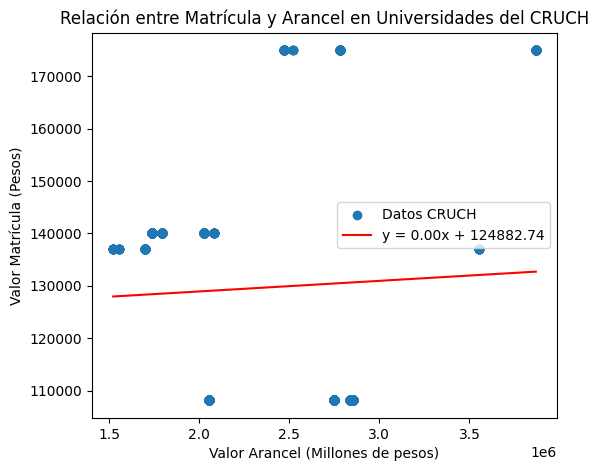

In [85]:
Tipoinstitucion_IP = df[df['TIPO DE INSTITUCION'] == 'Universidades CRUCH']

v_indep = Tipoinstitucion_CRUCH['VALOR ARANCEL (PESOS)']
v_depen = Tipoinstitucion_CRUCH['VALOR MATRICULA (PESOS)']

modelo = np.polyfit(v_indep, v_depen, 1)
pendiente, intercepto = modelo

print(f'Pendiente: {pendiente:.2f}\nIntercepto: {intercepto:.2f}')
print(f'El modelo de regresión lineal es f(x)={pendiente:.2f}x + {intercepto:.2f}')

# Gráfico
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(v_indep, v_depen, label='Datos CRUCH')
x_seq = np.linspace(min(v_indep), max(v_indep), 100)
ax.plot(x_seq, pendiente * x_seq + intercepto, color='red', label=f'y = {pendiente:.2f}x + {intercepto:.2f}')
ax.set_title('Relación entre Matrícula y Arancel en Universidades del CRUCH')
ax.set_xlabel('Valor Arancel (Millones de pesos)')
ax.set_ylabel('Valor Matrícula (Pesos)')
ax.legend()

plt.show()

In [ ]:
#Los grupos no se comportan parecido, ya que en los Centros de Formación Técnica (CFT), los Institutos Profesionales (IP) 
# y las Universidades Privadas su correlación es fuerte, en contraste con las Universidades del CRUCH que muestran una
# correlación débil.

In [ ]:
#No vale la pena estudiar todos los grupos juntos porque cada tipo de institución tiene dinámicas internas 
#en relación con matrícula y aranceles.

Pregunta 2
¿Cuál es la relación entre el arancel y la duración de la carrera correspondiente?
¿Es verdad que, mientras más larga la carrera, más cara?
¿Será igual en todas las áreas del conocimiento?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_1 = pd.read_excel('15_MATRICULAS_ED_SUPERIOR_AYSEN_2021.xlsx')
df_1

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,1102,Femenino,31,30 a 34,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Tecnicas,Administracion y Comercio,5,0,5,140000,1736000,Aysen,Coyhaique,Coyhaique
1,1701,Masculino,54,40 y mas,2020,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Tecnologia,4,0,4,240000,2240000,Aysen,Coyhaique,Coyhaique
2,2582,Femenino,48,40 y mas,2020,Primer semestre,Institutos Profesionales,IP LIBERTADOR DE LOS ANDES,NO ACREDITADA,NaN,...,Carreras Tecnicas,Ciencias Sociales,5,1,5,60000,1080000,Aysen,Coyhaique,Coyhaique
3,4367,Masculino,20,20 a 24,2020,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Administracion y Comercio,4,0,4,240000,2284000,Aysen,Coyhaique,Coyhaique
4,4384,Femenino,43,40 y mas,2019,Primer semestre,Institutos Profesionales,IP LIBERTADOR DE LOS ANDES,NO ACREDITADA,NaN,...,Carreras Tecnicas,Ciencias Sociales,5,1,5,60000,1080000,Aysen,Coyhaique,Coyhaique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,1046361,Masculino,19,15 a 19,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Profesionales,Tecnologia,4,0,4,175000,3869000,Aysen,Coyhaique,Coyhaique
2345,1046510,Femenino,23,20 a 24,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Profesionales,Educacion,10,0,10,175000,2781000,Aysen,Coyhaique,Coyhaique
2346,1046738,Femenino,30,30 a 34,2020,Primer semestre,Centros de Formacion Tecnica,CFT LOS LAGOS,NO ACREDITADA,NaN,...,Carreras Tecnicas,Administracion y Comercio,5,1,5,115000,1150000,Aysen,Coyhaique,Coyhaique
2347,1047571,Femenino,21,20 a 24,2018,Primer semestre,Universidades Privadas,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP,ACREDITADA,27/11/2018 AL 27/11/2021,...,Carreras Profesionales,Educacion,8,0,8,240000,1994000,Aysen,Coyhaique,Coyhaique


In [6]:
# Convertir a numérico
df_1['VALOR ARANCEL (PESOS)'] = pd.to_numeric(df_1['VALOR ARANCEL (PESOS)'], errors='coerce')
df_1['DURACION TOTAL CARRERA (SEMESTRES)'] = pd.to_numeric(df_1['DURACION TOTAL CARRERA (SEMESTRES)'], errors='coerce')

df_1 = df_1.dropna(subset=['VALOR ARANCEL (PESOS)', 'DURACION TOTAL CARRERA (SEMESTRES)'])
df_1

,ID,GENERO,EDAD,RANGO EDAD,AÑO INGRESO,SEMESTRE INGRESO,TIPO DE INSTITUCION,NOMBRE DE INSTITUCION,ACREDITACION INSTITUCIONAL,PERIODO DE ACREDITACION,...,NIVEL CARRERA,AREA CONOCIMIENTO,DURACION PLAN DE ESTUDIO (SEMESTRES),DURACION PROCESO TITULACION (SEMESTRES),DURACION TOTAL CARRERA (SEMESTRES),VALOR MATRICULA (PESOS),VALOR ARANCEL (PESOS),REGION SEDE,PROVINCIA SEDE,COMUNA SEDE
0,1102,Femenino,31,30 a 34,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Tecnicas,Administracion y Comercio,5,0,5,140000,1736000,Aysen,Coyhaique,Coyhaique
1,1701,Masculino,54,40 y mas,2020,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Tecnologia,4,0,4,240000,2240000,Aysen,Coyhaique,Coyhaique
2,2582,Femenino,48,40 y mas,2020,Primer semestre,Institutos Profesionales,IP LIBERTADOR DE LOS ANDES,NO ACREDITADA,NaN,...,Carreras Tecnicas,Ciencias Sociales,5,1,5,60000,1080000,Aysen,Coyhaique,Coyhaique
3,4367,Masculino,20,20 a 24,2020,Primer semestre,Centros de Formacion Tecnica,CFT INACAP,ACREDITADA,05/01/2018 AL 05/01/2025,...,Carreras Tecnicas,Administracion y Comercio,4,0,4,240000,2284000,Aysen,Coyhaique,Coyhaique
4,4384,Femenino,43,40 y mas,2019,Primer semestre,Institutos Profesionales,IP LIBERTADOR DE LOS ANDES,NO ACREDITADA,NaN,...,Carreras Tecnicas,Ciencias Sociales,5,1,5,60000,1080000,Aysen,Coyhaique,Coyhaique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,1046361,Masculino,19,15 a 19,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Profesionales,Tecnologia,4,0,4,175000,3869000,Aysen,Coyhaique,Coyhaique
2345,1046510,Femenino,23,20 a 24,2021,Primer semestre,Universidades CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,ACREDITADA,12/11/2015 AL 12/11/2021,...,Carreras Profesionales,Educacion,10,0,10,175000,2781000,Aysen,Coyhaique,Coyhaique
2346,1046738,Femenino,30,30 a 34,2020,Primer semestre,Centros de Formacion Tecnica,CFT LOS LAGOS,NO ACREDITADA,NaN,...,Carreras Tecnicas,Administracion y Comercio,5,1,5,115000,1150000,Aysen,Coyhaique,Coyhaique
2347,1047571,Femenino,21,20 a 24,2018,Primer semestre,Universidades Privadas,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP,ACREDITADA,27/11/2018 AL 27/11/2021,...,Carreras Profesionales,Educacion,8,0,8,240000,1994000,Aysen,Coyhaique,Coyhaique


In [7]:
tabla_t = df_1.groupby('DURACION TOTAL CARRERA (SEMESTRES)')['VALOR ARANCEL (PESOS)'].mean().round(0)
tabla_t

DURACION TOTAL CARRERA (SEMESTRES)
2     2036000.0
4     2295000.0
5     1543657.0
6     1687348.0
8     2000413.0
9     1587358.0
10    2650920.0
Name: VALOR ARANCEL (PESOS), dtype: float64

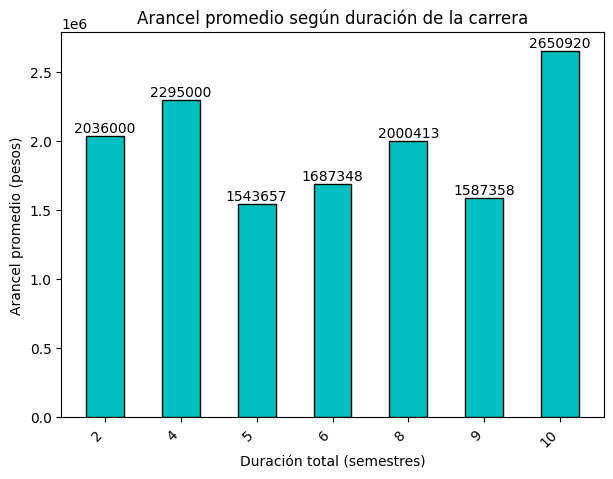

In [9]:
#Grafico Histograma

categorias = tabla_t.index
f = tabla_t.values  

fig, ax = plt.subplots(figsize=(7,5))
histograma = ax.bar(categorias.astype(str), f, color='c', edgecolor='black', width=0.5)

ax.set_title('Arancel promedio según duración de la carrera')
ax.set_xlabel('Duración total (semestres)')
ax.set_ylabel('Arancel promedio (pesos)')

ax.bar_label(histograma, fmt='%.0f') 
plt.xticks(rotation=45, ha='right')
plt.show()

El gráfico muestra el arancel promedio de las carreras según su duración total en semestres. Se observa que, a medida que aumenta la duración de la carrera, también tiende a aumentar el arancel promedio. Las carreras más largas (como las de 8,9 o 10 semestres) presentan valores de arancel más altos que las carreras más cortas, lo que refuerza la relación positiva entre ambas variables

In [15]:
#Media
media = df_1['VALOR ARANCEL (PESOS)'].mean().round(0)
media

np.float64(1976379.0)

In [16]:
#Mediana
mediana = df_1['VALOR ARANCEL (PESOS)'].median()
mediana

np.float64(2029000.0)

In [17]:
#Moda
moda = df_1['VALOR ARANCEL (PESOS)'].mode()[0]
moda

np.int64(1150000)

In [18]:
print(f"La media del arancel es: ${media:.0f}, la mediana del arancel es: ${mediana:.0f} y la moda del arancel es: ${moda:.0f}")

La media del arancel es: $1976379, la mediana del arancel es: $2029000 y la moda del arancel es: $1150000


In [19]:
#Correlación
correlacion = df_1['VALOR ARANCEL (PESOS)'].corr(df_1['DURACION TOTAL CARRERA (SEMESTRES)'])

print(f"Correlación entre arancel y duración: {correlacion:.3f}")

Correlación entre arancel y duración: 0.419


¿Es verdad que, mientras más larga la carrera, más cara?

- Si, existe la evidencia que mientras más larga es la carrera, más caro es el arancel. La correlación entre la duración total en semestres y el arancel es de 0.419, lo que indica una relación positiva-moderada. Este significa quem en general, las carrearas con más semestres tienden a presentar aranceles más altos, aunque la relación no es perfecta. Aún así, la tendencia general del conjunto de datos confirma que a mayor duración, mayor arancel.

Determinar si una variable continua (elige una de la base de datos) sigue una distribución Normal.
a) Coeficiente de asimetría
b) Coeficiente de curtosis
c) Medidas de tendencia central: Media, Moda, Mediana.
d) Histograma (forma de una campana equilibrada).